1. Train a single perceptron to learn two classes with two inputs x1 and x2. 

Assume that all the weights of the perceptron are initialized as 0, learning rate as 1. 

Show the calculation for each step. Plot all the samples and final decision boundary.

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [215]:
data = [[0.5, 3.0, 2], [1, 3.0, 2], [0.5, 2.5, 2], [1, 2.5, 2], [1.5, 2.5, 2], [4.5, 1, 1], [5, 1, 1], [4.5, 0.5, 1], [5.5, 0.5, 1]]
data1 = np.array(data)
a = np.array([0, 0, 0]) 

In [216]:
def perceptron(a, data, learning_rate):
    # Transform data within the function
    trans_data = []
    for d in data:
        if d[2] == 2 or d[2] == 0:
            # For class 2, negate the features and assign a -1 bias
            trans_data.append([-d[0], -d[1], -1])
        else:
            # For class 1, retain positive features and assign a +1 bias
            trans_data.append([d[0], d[1], 1])
    
    trans_data = np.array(trans_data)
    i = 0
    count = 0
    iters = 1
    max_iters = 1000

    while True:
        transa = np.transpose(a)
        #Calculate the dot product
        err = transa @ trans_data[i]

        #Print computation details
        print(f"Iteration:{iters}")
        print(f"Feature vector:{trans_data[i][:2]}")
        print(f"Current weights:{a[:2]}")
        print(f"Bias:{a[2]}")
        print(f"Weighted sum:{err}")

        if err > 0:
            #If positive no need to update weights
            count += 1
            i = (i + 1) % len(trans_data)
        else:
            #If negative update the weights
            count = 0
            a = a + learning_rate * trans_data[i]

        #If everything is classified correctly or the maximum number of iterations is reached, break
        if count == len(trans_data) or iters > max_iters:
            break

        
        iters += 1

    #array for final weights
    weight = np.array([a[0], a[1]])
    print("Final weights obtained:", weight)
    bias = a[2]
    print("Bias: ", bias)
    return weight, bias, iters


In [217]:
# Function to plot data points and decision boundary
def plot_perceptron_result(data, weights, bias, l1, l2):
    
    class1 = data[data[:, 2] == l1] 
    class2 = data[data[:, 2] == l2]

    # Ploting data points
    plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Class 1')
    plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Class 2')

    # Generating decision boundary x-values
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]) + 1, 100)
    
    # Calculate the corresponding y-values for the decision boundary
    y_values = -(weights[0] * x_values + bias) / weights[1]

    # Plotting the decision boundary
    plt.plot(x_values, y_values, label='Decision Boundary', color='green')

    # Setting labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=3)    
    plt.title('Perceptron Classification')
    plt.show()



Iteration:1
Feature vector:[-0.5 -3. ]
Current weights:[0 0]
Bias:0
Weighted sum:0.0
Iteration:2
Feature vector:[-0.5 -3. ]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:10.25
Iteration:3
Feature vector:[-1. -3.]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:10.5
Iteration:4
Feature vector:[-0.5 -2.5]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:8.75
Iteration:5
Feature vector:[-1.  -2.5]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:9.0
Iteration:6
Feature vector:[-1.5 -2.5]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:9.25
Iteration:7
Feature vector:[4.5 1. ]
Current weights:[-0.5 -3. ]
Bias:-1.0
Weighted sum:-6.25
Iteration:8
Feature vector:[4.5 1. ]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:16.0
Iteration:9
Feature vector:[5. 1.]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:18.0
Iteration:10
Feature vector:[4.5 0.5]
Current weights:[ 4. -2.]
Bias:0.0
Weighted sum:17.0
Iteration:11
Feature vector:[5.5 0.5]
Current weights:[ 4. -2.]
Bias:0.0
Weight

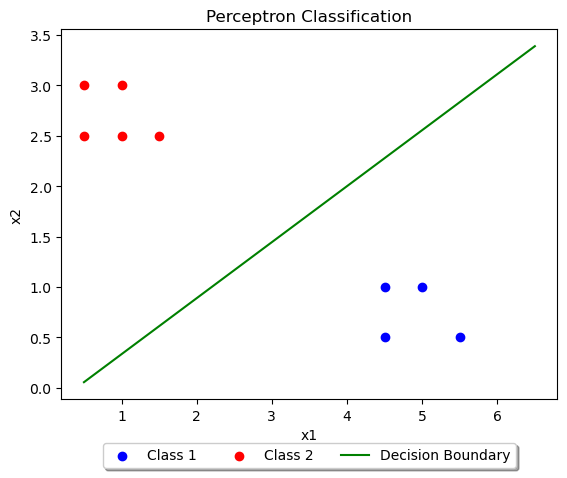


No of iterations: 25


In [218]:
# Plotting the data values and the decision boundary using the above function
wq1, bias1, iters1 = perceptron(a, data, 1)
plot_perceptron_result(np.array(data1), wq1, bias1, 1, 2)
print(f"\nNo of iterations: {iters1}")

2. Train a single perceptron to learn an AND gate with two inputs x1 and x2. 

Assume that all the weights of the perceptron are initialized as 0. 

Show the calculation for each step and also draw the decision boundary for each update.

In [219]:
#Initializing weights with zero
w = np.array([0, 0, 0])
b = 0
#Inputs for learning the AND gate
dataq2 = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]

In [220]:
weightsq2, biasq2, itersq2 = perceptron(w, dataq2, 1)
print(f"\nNo of iterations: {itersq2}")

Iteration:1
Feature vector:[0 0]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[0 0]
Current weights:[0 0]
Bias:-1
Weighted sum:1
Iteration:3
Feature vector:[ 0 -1]
Current weights:[0 0]
Bias:-1
Weighted sum:1
Iteration:4
Feature vector:[-1  0]
Current weights:[0 0]
Bias:-1
Weighted sum:1
Iteration:5
Feature vector:[1 1]
Current weights:[0 0]
Bias:-1
Weighted sum:-1
Iteration:6
Feature vector:[1 1]
Current weights:[1 1]
Bias:0
Weighted sum:2
Iteration:7
Feature vector:[0 0]
Current weights:[1 1]
Bias:0
Weighted sum:0
Iteration:8
Feature vector:[0 0]
Current weights:[1 1]
Bias:-1
Weighted sum:1
Iteration:9
Feature vector:[ 0 -1]
Current weights:[1 1]
Bias:-1
Weighted sum:0
Iteration:10
Feature vector:[ 0 -1]
Current weights:[1 0]
Bias:-2
Weighted sum:2
Iteration:11
Feature vector:[-1  0]
Current weights:[1 0]
Bias:-2
Weighted sum:1
Iteration:12
Feature vector:[1 1]
Current weights:[1 0]
Bias:-2
Weighted sum:-1
Iteration:13
Feature vector:[1 1]
Current weights:[2

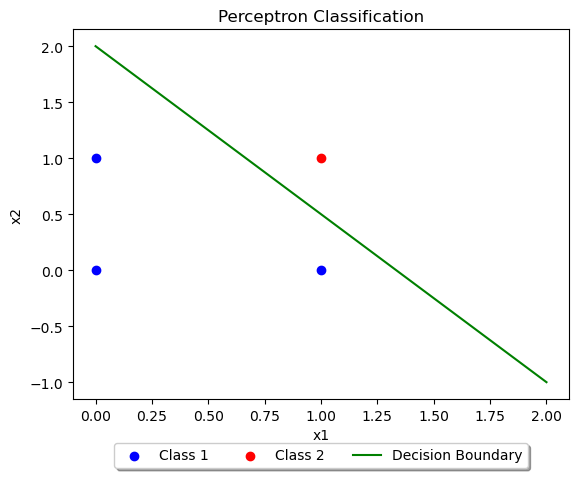

In [221]:
plot_perceptron_result(np.array(dataq2), weightsq2, biasq2, 0, 1)

3. Train a single perceptron to learn the two classes in the following table.

where x1 and x2 are the inputs and ω is the target class. Assume that all the 

weights of the perceptron are initialized as 0 with learning rates 0.001, 0.01, 0.5 

separately. Plot the samples and decision boundary. Also, tabulate the number of 

iterations required to converge the perception algorithm with these two learning 

rates. 


In [222]:
#Writing given data
dataq3 = [[2, 2, 1], [-1, -3, 0], [-1, 2, 1], [0, -1, 0], [1, 3, 1], [1, -2, 0], [-1, -1, 1]]
l1 = 0.001
l2 = 0.01
l3 = 0.5

Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.009000000000000001
Iteration:3
Feature vector:[1 3]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.007
Iteration:4
Feature vector:[-1  2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.003
Iteration:5
Feature vector:[0 1]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.001
Iteration:6
Feature vector:[1 3]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.009000000000000001
Iteration:7
Feature vector:[-1  2]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:0.001
Iteration:8
Feature vector:[-1 -1]
Current weights:[0.002 0.002]
Bias:0.001
Weighted sum:-0.003
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.001 0.001]
Bias:0.002
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:0.003
Weighted sum:0.003
Iteration:11
Feature vector:[2 2]
Current weights:[0

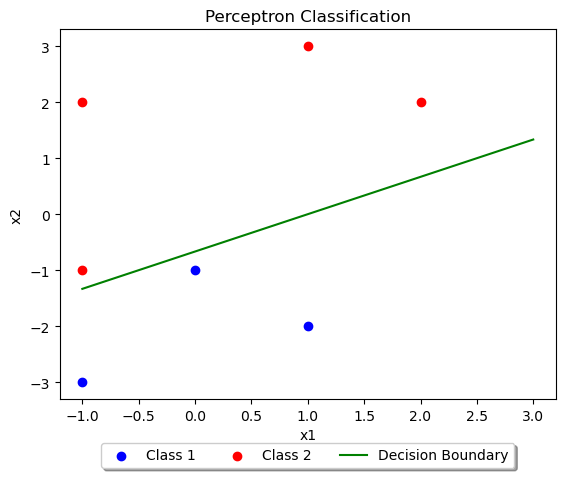

No of iterations for learning rate 0.001 is 48


In [223]:
#Learning rate 0.001
#Initialize weights
w3 = np.array([0, 0, 0])
b = 0
weightsq3, biasq3, itersq3 = perceptron(w3, dataq3, l1)
plot_perceptron_result(np.array(dataq3), weightsq3, biasq3, 0, 1)
print(f"No of iterations for learning rate {l1} is {itersq3}")

Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.09
Iteration:3
Feature vector:[1 3]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.07
Iteration:4
Feature vector:[-1  2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.03
Iteration:5
Feature vector:[0 1]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.01
Iteration:6
Feature vector:[1 3]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.09
Iteration:7
Feature vector:[-1  2]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:0.01
Iteration:8
Feature vector:[-1 -1]
Current weights:[0.02 0.02]
Bias:0.01
Weighted sum:-0.03
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.01 0.01]
Bias:0.02
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:0.03
Weighted sum:0.03
Iteration:11
Feature vector:[2 2]
Current weights:[0. 0.]
Bias:0.03
Weighted sum:0.03
Iteration:12
Feature vector:[

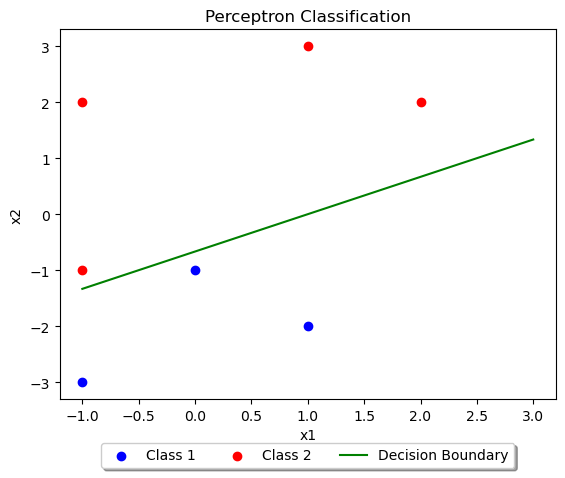

No of iterations for learning rate 0.01 is 48


In [224]:
#Learning rate 0.001
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weights, bias, iters2 = perceptron(w, dataq3, l2)
plot_perceptron_result(np.array(dataq3), weights, bias, 0, 1)
print(f"No of iterations for learning rate {l2} is {iters2}")

Iteration:1
Feature vector:[2 2]
Current weights:[0 0]
Bias:0
Weighted sum:0
Iteration:2
Feature vector:[2 2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:4.5
Iteration:3
Feature vector:[1 3]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:3.5
Iteration:4
Feature vector:[-1  2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:1.5
Iteration:5
Feature vector:[0 1]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:0.5
Iteration:6
Feature vector:[1 3]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:4.5
Iteration:7
Feature vector:[-1  2]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:0.5
Iteration:8
Feature vector:[-1 -1]
Current weights:[1. 1.]
Bias:0.5
Weighted sum:-1.5
Iteration:9
Feature vector:[-1 -1]
Current weights:[0.5 0.5]
Bias:1.0
Weighted sum:0.0
Iteration:10
Feature vector:[-1 -1]
Current weights:[0. 0.]
Bias:1.5
Weighted sum:1.5
Iteration:11
Feature vector:[2 2]
Current weights:[0. 0.]
Bias:1.5
Weighted sum:1.5
Iteration:12
Feature vector:[1 3]
Current weights:[0. 0.]
Bias:1.5
Weighted su

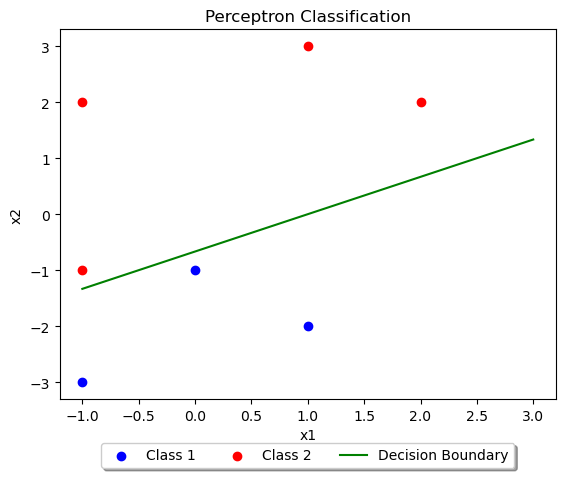

No of iterations for learning rate 0.5 is 48


In [225]:
#Learning rate 0.5
#Initialize weights
w = np.array([0, 0, 0])
b = 0
weightsq3, biasq3, iters3 = perceptron(w, dataq3, l3)
plot_perceptron_result(np.array(dataq3), weightsq3, biasq3, 0, 1)
print(f"No of iterations for learning rate {l3} is {iters3}")

4. From the iris dataset, choose the ’petal length’, ’sepal width’ for “setosa” and  

“virginica” flowers. Learn a decision boundary for the two features using a single 

perceptron. Assume that all the weights of the perceptron are initialized as 0 with 

the learning rate of 0.01. Output the final weight vector and plot the samples and 

the decision boundary.

[Note: Use iris.csv file in the attachments.]

In [226]:
#Read the dataset into a dataframe. 
iris_df = pd.read_csv('iris.csv')
iris_df.head()
#iris_df['Species'].unique()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [227]:
#Here classification is based on setosa and virginica
#So drop veriscolor features
df = iris_df[iris_df['Species'] != 'Iris-versicolor']
df = df[['PetalLengthCm', 'SepalWidthCm', 'Species']]

#Label virginica as 2 and setosa as 1
df['Label'] = df['Species'].apply(lambda x: 2 if x == 'Iris-virginica' else 1)
df = df.drop(columns = ['Species'])

df

,PetalLengthCm,SepalWidthCm,Label
0,1.4,3.5,1
1,1.4,3.0,1
2,1.3,3.2,1
3,1.5,3.1,1
4,1.4,3.6,1
...,...,...,...
145,5.2,3.0,2
146,5.0,2.5,2
147,5.2,3.0,2
148,5.4,3.4,2


In [228]:
#Convert into numpy array for using the data in perceptron function
data = np.array(df[['PetalLengthCm' ,'SepalWidthCm', 'Label']])

weight = np.array([0, 0, 0])
w, b, iters = perceptron(weight, data, 0.01)
print(f"No of iterations is {iters}")

Iteration:1
Feature vector:[1.4 3.5]
Current weights:[0 0]
Bias:0
Weighted sum:0.0
Iteration:2
Feature vector:[1.4 3.5]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.1521
Iteration:3
Feature vector:[1.4 3. ]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.1346
Iteration:4
Feature vector:[1.3 3.2]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.14020000000000002
Iteration:5
Feature vector:[1.5 3.1]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.1395
Iteration:6
Feature vector:[1.4 3.6]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.15560000000000004
Iteration:7
Feature vector:[1.7 3.9]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.1703
Iteration:8
Feature vector:[1.4 3.4]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.1486
Iteration:9
Feature vector:[1.5 3.4]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.15000000000000002
Iteration:10
Feature vector:[1.4 2.9]
Current weights:[0.014 0.035]
Bias:0.01
Weighted sum:0.1311
Iter

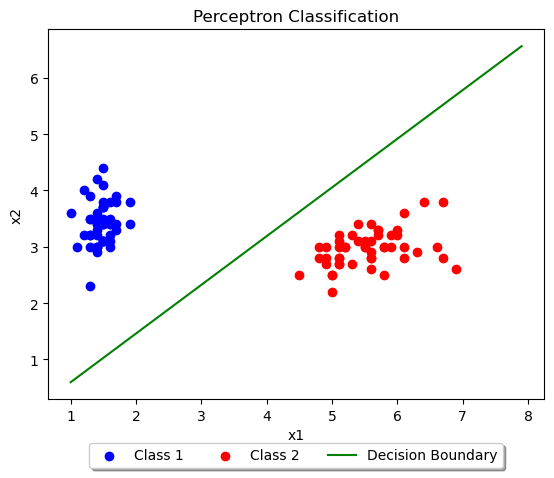

In [229]:
plot_perceptron_result(data, w, b, 1, 2)